> Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

After this code, these libraries are successfully loaded and allow us to load, clean, analyze, and visualize data.

> Load Raw Data
Next, we load the NOAA daily precipitation dataset into to a DataFrame.

In [3]:
df_seattle = pd.read_csv('../data/seattle_rain.csv')

In [4]:
type(df_seattle)

pandas.core.frame.DataFrame

In [5]:
df_stlouis = pd.read_csv('../data/stl_rain.csv')

In [6]:
df_newyork = pd.read_csv('../data/newyork_rain.csv')

After the code, we have the data loaded into a DataFrame then we can inspect its structure

In [7]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [8]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


from the inspection, we can see that they don't have equivilent in columns and missing lot of data. Next, we can extract only the columns to see what columns in each dataset.

In [9]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [10]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [11]:
df_newyork.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

from the code above, we can clearly see how different in the columns of each dataset, then we check the missing values in each columns and their type of data.

In [12]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [13]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [14]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1824 non-null   float64
 4   SNOW     1826 non-null   float64
 5   SNWD     1826 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.7+ KB


from the dataset information above, we can see that Seattle and St Louis having a lot of missing value of precipiation. We then can use the shape method to check how many entries in the specific dataset.

In [15]:
print(df_seattle.shape)

(1658, 10)


In [16]:
print(df_stlouis.shape)

(54574, 8)


In [17]:
print(df_newyork.shape)

(1826, 6)


from the code above, we can see that St Louis contain a lot of dataset much more than other dataset that could be caused by contain many stations. We then need to check the data of station columns

In [18]:
df_stlouis['STATION']

0        US1MOSS0027
1        US1MOSS0027
2        US1MOSS0027
3        US1MOSS0027
4        US1MOSS0027
            ...     
54569    US1MOSL0084
54570    US1MOSL0084
54571    US1MOSL0084
54572    US1MOSL0084
54573    US1MOSL0084
Name: STATION, Length: 54574, dtype: object

In [19]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [20]:
df_stlouis['STATION'].nunique()

44

In [21]:
df_seattle['STATION'].nunique()

1

In [22]:
df_newyork['STATION'].nunique()

1

from the code above, we notice that the St Louis contain 44 unique stations that cause the data much more than other dataset. From the dataset information that we got from above, we know that the data type of date column is object, so we may have problem with type of Date Time. For this problem, we need to change the data to the correct type of Date.

In [23]:
df_stlouis['DATE']

0        2017-01-01
1        2017-01-03
2        2017-01-04
3        2017-01-05
4        2017-01-06
            ...    
54569    2022-12-08
54570    2022-12-13
54571    2022-12-14
54572    2022-12-15
54573    2022-12-16
Name: DATE, Length: 54574, dtype: object

In [24]:
df_seattle['DATE'].max()

'9/9/22'

In [25]:
df_seattle['DATE'].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [26]:
df_newyork['DATE'].max()

'2022-12-31'

In [27]:
df_newyork['DATE'].tail()

1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, dtype: object

After checking the max date of Seattle using the max function, it return the value of '9/9/22' but the actual data from tail method is '12/31/22'. Therefore, the current data type of date is incorrect for Seattle's dataset. Next step is change the type and reassign the values back to the Date column.

In [28]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/hm/_316rgmd4v763bh_ttk3pzkr0000gn/T/ipykernel_88592/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [29]:
df_newyork['DATE'] = pd.to_datetime(df_newyork['DATE'])

In [30]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [31]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [32]:
df_newyork['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1821   2022-12-27
1822   2022-12-28
1823   2022-12-29
1824   2022-12-30
1825   2022-12-31
Name: DATE, Length: 1826, dtype: datetime64[ns]

In [33]:
df_stlouis['DATE']

0       2017-01-01
1       2017-01-03
2       2017-01-04
3       2017-01-05
4       2017-01-06
           ...    
54569   2022-12-08
54570   2022-12-13
54571   2022-12-14
54572   2022-12-15
54573   2022-12-16
Name: DATE, Length: 54574, dtype: datetime64[ns]

In [34]:
df_seattle['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [35]:
df_seattle['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [36]:
df_newyork['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [37]:
df_newyork['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [38]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [39]:
df_newyork['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [40]:
df_stlouis['DATE'].agg(['min', 'max'])

min   2017-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

After fixing the data type of date column, these dataset now contain the correct type of date for next step that show the visualization for date and precipitation.

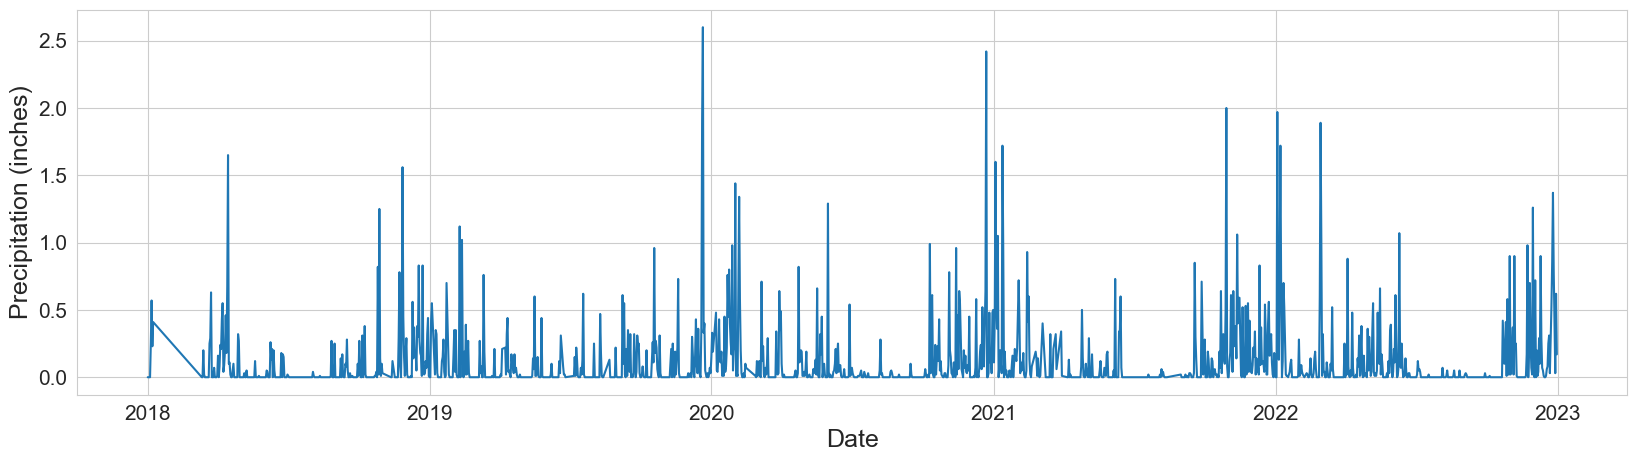

In [41]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

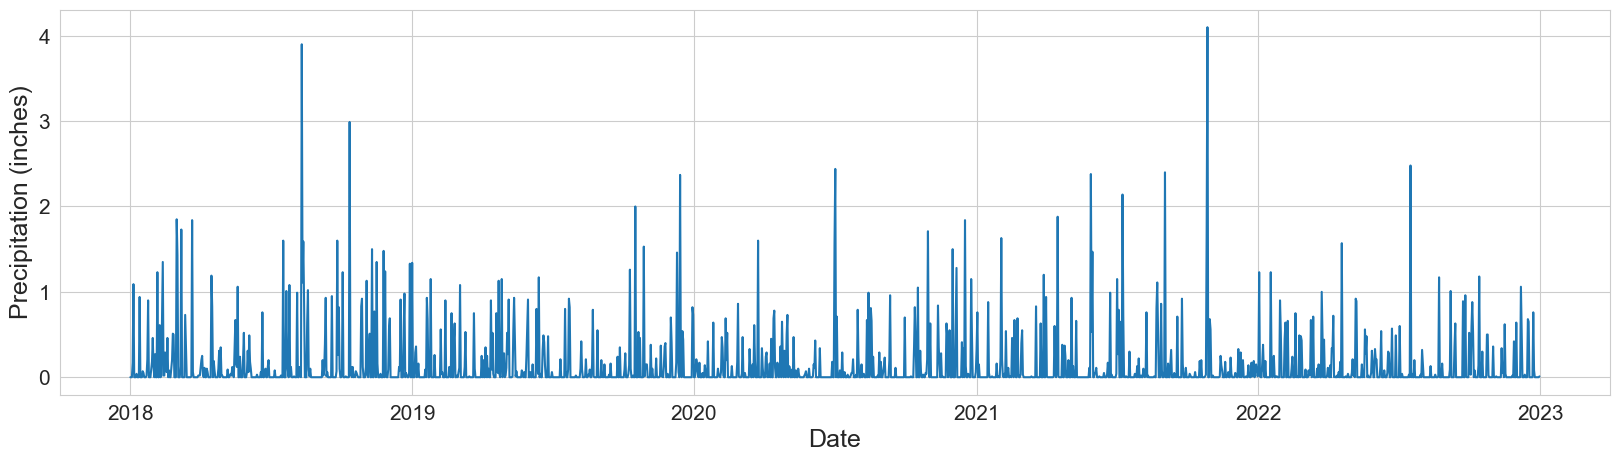

In [42]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_newyork, x='DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

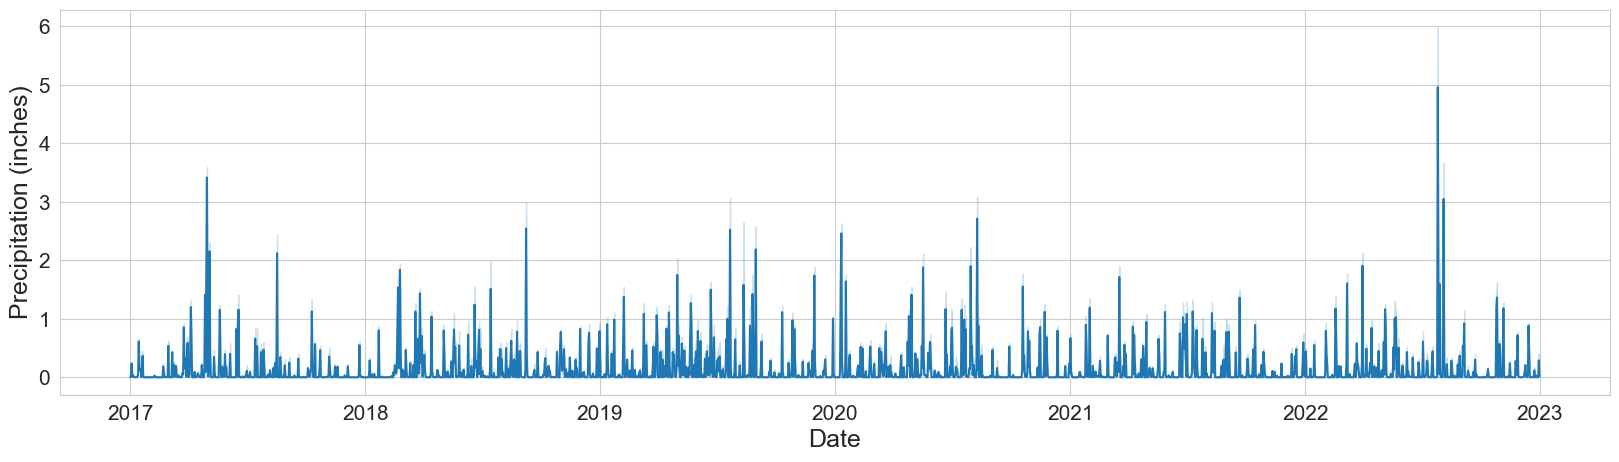

In [43]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_stlouis, x='DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

After check the line plot, we can see that St Louis's dataset have data from 2017 to 2023, but we only need the data from 01/01/2018 until 12/31/2022. Therefore, we start cleaning the data to contain only the range of date that we need.

In [44]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


After the code, we know that the first 5 rows are start from 01/01/2017, so we need to reassign the DataFrame of St Louis to dataset that contain only data if its date is on or after 01/01/2018.

In [45]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [46]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


After clean data based on the date, we now have correct range of required date. However, the data still contain multiple stations that cause the dataset contail much more data and station compare to other datasets. Therefore, we reassign dataset of St Louis to contain only data from ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US station.

In [47]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [48]:
df_stlouis['STATION'].unique()

array(['USW00013994'], dtype=object)

After clean the data based on the station, we now only have one station for St Louis dataset. Then we can check the information of dataset again to make sure that the data is correct and ready for analysis.

In [49]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


Now we can see the entries of St Louis drop down to have almost same length of other datasets. Next step is combine two dataset into a DataFrame for date and precipitation column based on date column using outer way,

In [50]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [51]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


In [52]:
df2 = df_newyork[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [53]:
df2.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.17,0.00
4,2018-01-05,1.09,0.25


After merge two dataset, we have a date column and two precipitation columns from St Louis and Seattle. Next step is make the city column to be inseparate rows instead of separate columns.

In [54]:
df = pd.melt(df, id_vars=['DATE'], var_name='city', value_name='precipitation')

In [55]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


In [56]:
df2 = df2.melt(id_vars=['DATE'], var_name='city', value_name='precipitation')

In [57]:
df2.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.17
4,2018-01-05,PRCP_x,1.09


After reformat the city column, we now have a DataFrame that contain date, city and precipitation columns. Next step is change the value of city column to be the name of city instead of PRCP_x and PRCP_y.

In [58]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'STL'

In [59]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [60]:
df.head()

,DATE,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [61]:
df2.loc[df2['city'] == 'PRCP_x', 'city'] = 'NYC'

In [62]:
df2.loc[df2['city'] == 'PRCP_y', 'city'] = 'SEA'

In [63]:
df2.head()

,DATE,city,precipitation
0,2018-01-01,NYC,0.00
1,2018-01-02,NYC,0.00
2,2018-01-03,NYC,0.00
3,2018-01-04,NYC,0.17
4,2018-01-05,NYC,1.09


In [64]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


In [65]:
df2.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


Now we have clear city name for each row to be eaiser for analysis, but then we should also rename the DATE column to lower case to match with other columns.

In [66]:
df = df.rename(columns={'DATE': 'date'})

In [67]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [68]:
df2 = df2.rename(columns={'DATE': 'date'})

In [69]:
df2.head()

,date,city,precipitation
0,2018-01-01,NYC,0.00
1,2018-01-02,NYC,0.00
2,2018-01-03,NYC,0.00
3,2018-01-04,NYC,0.17
4,2018-01-05,NYC,1.09


After setup the correct columns for new dataset, we get the information to insepect its structure.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3460 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [72]:
df.notna().sum()

date             3652
city             3652
precipitation    3462
dtype: int64

In [73]:
df2.notna().sum()

date             3652
city             3652
precipitation    3460
dtype: int64

In [74]:
df.isna().sum()

date               0
city               0
precipitation    190
dtype: int64

In [75]:
df2.isna().sum()

date               0
city               0
precipitation    192
dtype: int64

from the code above, we know that the new dataset has 190 missing value, and next step is checking how many data is missing in each city.

In [76]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [77]:
df.loc[df['city'] == 'STL', 'precipitation'].isna().sum()

np.int64(0)

In [78]:
df2.loc[df2['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [79]:
df2.loc[df2['city'] == 'NYC', 'precipitation'].isna().sum()

np.int64(2)

from the code above, we can know how many values are missing in each cities. Now we need to find a way to replace the missing value with a new value for next step. We then decide to replace the value based on the mean value of the specific day, so next step is assign a specific day of year to each row.

In [80]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [81]:
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


In [82]:
df2['day_of_year'] = pd.DatetimeIndex(df2['date']).day_of_year

In [83]:
df2.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,NYC,0.00,1
1,2018-01-02,NYC,0.00,2
2,2018-01-03,NYC,0.00,3
3,2018-01-04,NYC,0.17,4
4,2018-01-05,NYC,1.09,5
5,2018-01-06,NYC,0.00,6
6,2018-01-07,NYC,0.00,7
7,2018-01-08,NYC,0.00,8
8,2018-01-09,NYC,0.04,9
9,2018-01-10,NYC,0.00,10


Now each rows contain its day of year, then we will compute the mean for each day of the year for each cities and show the visualization of the result.

In [84]:
mean_day_precipitation = df.loc[
  df['city'] == 'SEA',
  ['precipitation', 'day_of_year']
].groupby('day_of_year').mean()

In [85]:
mean_day_precipitation_2 = df2.loc[
  df['city'] == 'SEA',
  ['precipitation', 'day_of_year']
].groupby('day_of_year').mean()

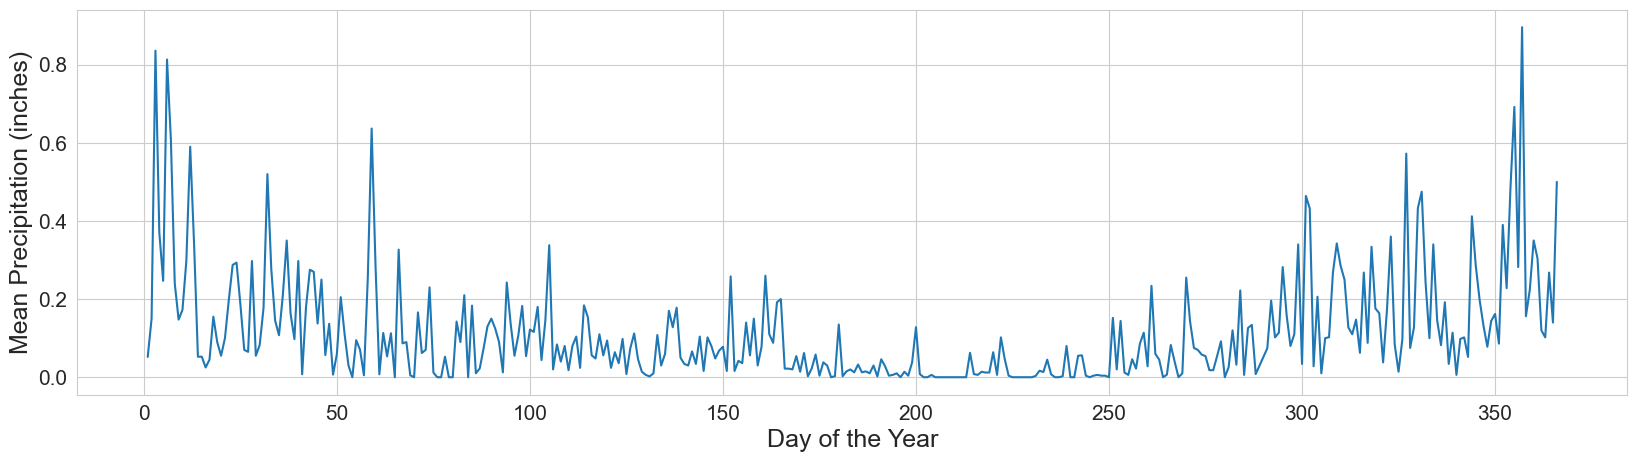

In [86]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation, x='day_of_year', y='precipitation')

plt.xlabel('Day of the Year', fontsize=18)
plt.ylabel('Mean Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

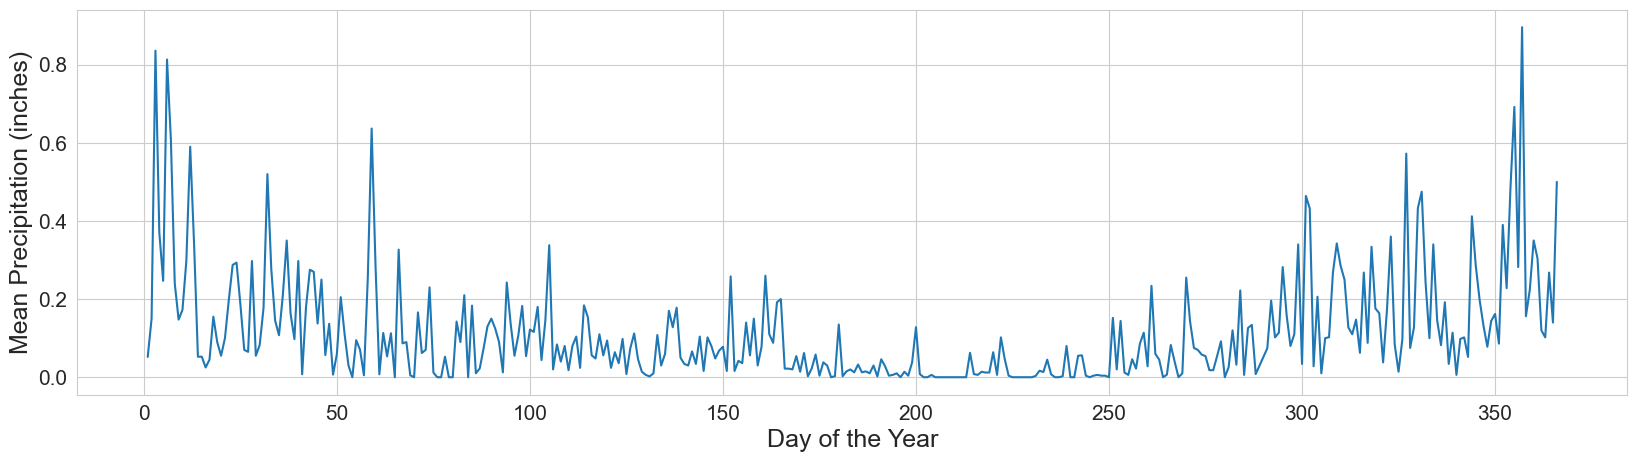

In [95]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_2, x='day_of_year', y='precipitation')

plt.xlabel('Day of the Year', fontsize=18)
plt.ylabel('Mean Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Now we can visualize the mean value for each day of year of Seattle. Next, we need to get the index of all rows that missing value of prepicipation.

In [87]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.0,1
1,2018-01-02,STL,0.0,2
2,2018-01-03,STL,0.0,3
3,2018-01-04,STL,0.0,4
4,2018-01-05,STL,0.0,5


In [88]:
df['precipitation'].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [89]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [90]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

In [96]:
indices2 = np.where(df2['precipitation'].isna() == True)[0]
indices2

array([  91,  425, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842,
       1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853,
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864,
       1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875,
       1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131,
       2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196,
       2197, 2214, 2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287,
       2288, 2362, 2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375,
       2376, 2377, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518,
       2519, 2520, 2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603,
       2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819,
       2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974,
       2975, 2983, 2984, 2986, 2987, 2988, 3000, 30

After having a list of indices that missing value, we then replace those with the mean value based on its day of the year's value.

In [91]:
for index in indices:
  df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index, 'day_of_year']].values[0]

In [97]:
for index in indices2:
  df2.loc[index, 'precipitation'] = mean_day_precipitation_2.loc[df2.loc[index, 'day_of_year']].values[0]

Now the DataFrame should not contain any missing value and we can check it again using the sum of isna method.

In [92]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

In [98]:
df2.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

After ensure the dataset now contain no missing value and ready for analysis, we can export the cleaned dataset to a new csv file and ready for next step.

In [93]:
df.to_csv('../data/clean_seattle_stlouis_weather.csv', encoding='utf-8-sig', index=False)

In [99]:
df2.to_csv('../data/clean_seattle_newyork_weather.csv', encoding='utf-8-sig', index=False)

The cleaned dataset is saved in ../data/clean_seattle_stlouis_weather.csv

Plot the daily precipitation for both cities on the same graph

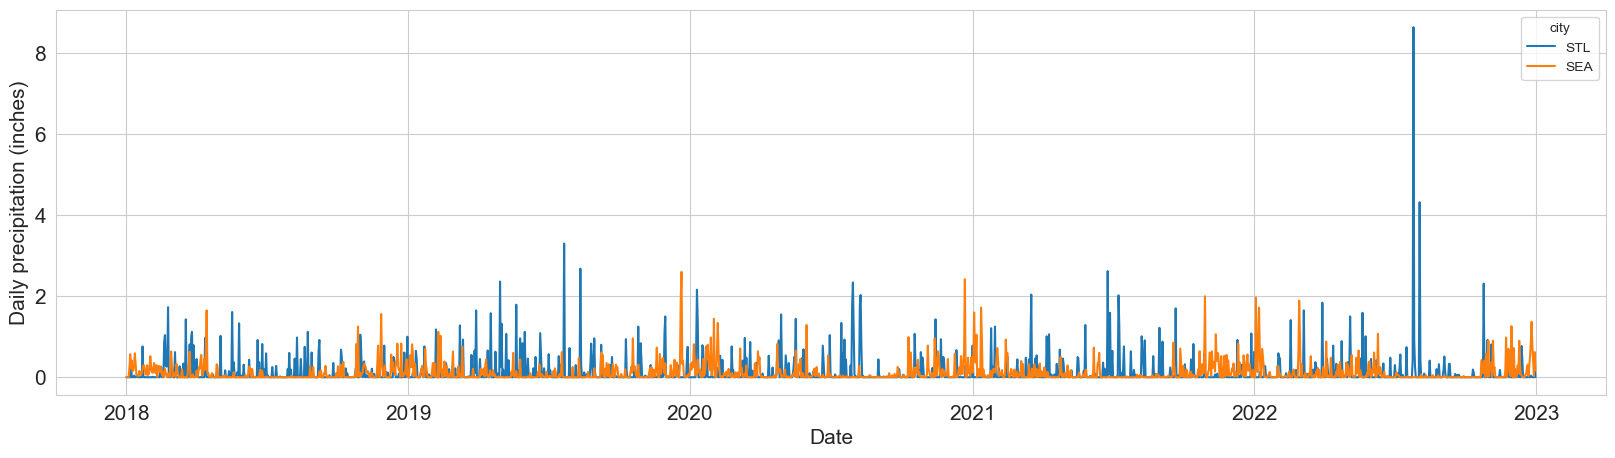

In [94]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

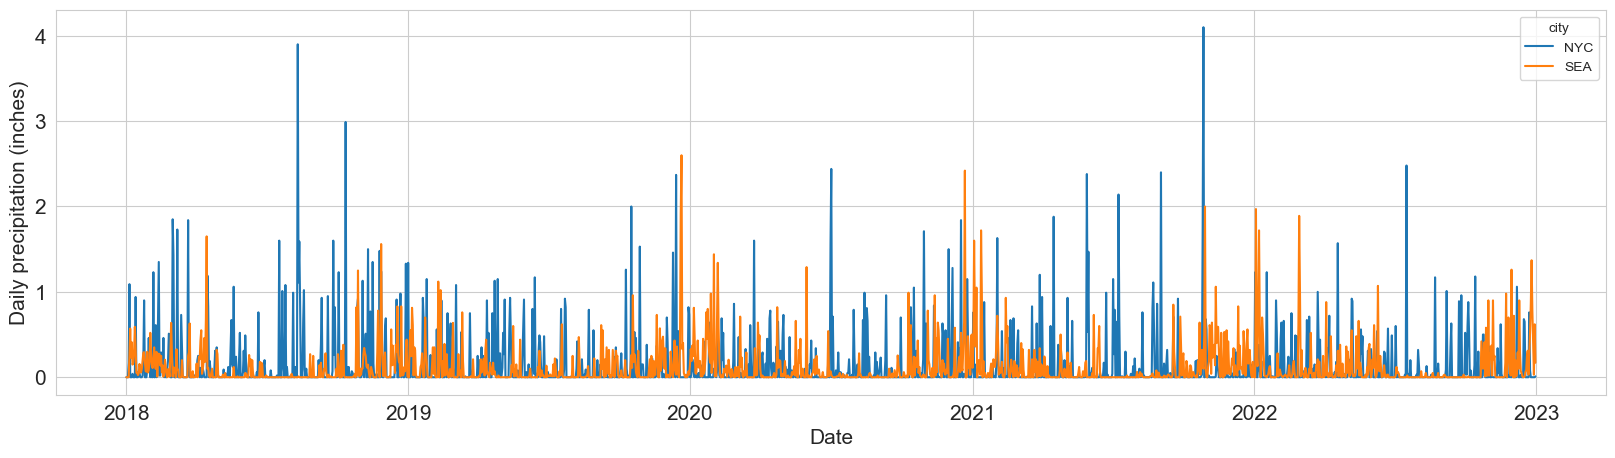

In [100]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df2, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The plot show how much rain in each cities from begining of 2018 until end of 2022

Compute basic numerical summaries for precipitation in each city

In [101]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64

In [102]:
df2[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count      mean       std  min  25%   50%   75%  max
city                                                             
NYC         1826.0  0.146154  0.356231  0.0  0.0  0.00  0.09  4.1
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.6

We then have the overall summaries information on the precipitation

Compare mean precipitation values averaged over all days

In [103]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
SEA,0.113270
STL,0.130345


In [104]:
df2[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
NYC,0.146154
SEA,0.113270


From the mean, we can see that Seattle has lower value than other cities

Show the values as a bar graph

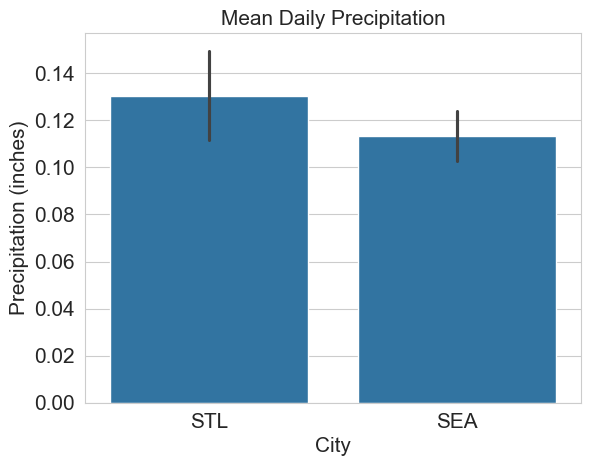

In [105]:
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

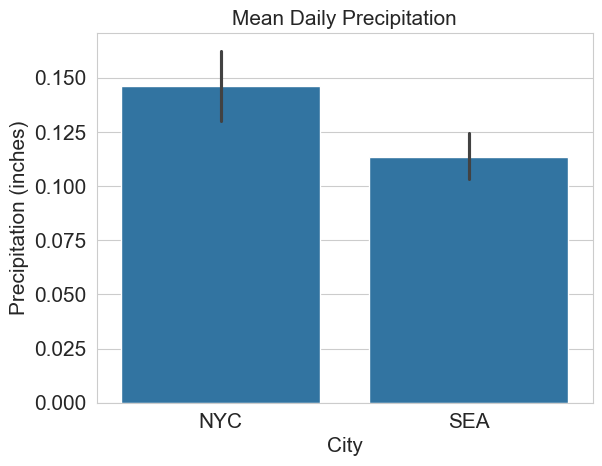

In [106]:
sns.barplot(data=df2, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The graph show more visualize how other cities has higher mean than Seattle with the error bar

Add a column to the data frame with the number of the month

In [107]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.0,1,1
1,2018-01-02,STL,0.0,2,1
2,2018-01-03,STL,0.0,3,1
3,2018-01-04,STL,0.0,4,1
4,2018-01-05,STL,0.0,5,1


In [108]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [109]:
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,NYC,0.00,1,1
1,2018-01-02,NYC,0.00,2,1
2,2018-01-03,NYC,0.00,3,1
3,2018-01-04,NYC,0.17,4,1
4,2018-01-05,NYC,1.09,5,1


In [110]:
df2['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

Now we have extract the month for each records for more visualization

Plot the distribution of precipitation amounts each month using boxplots

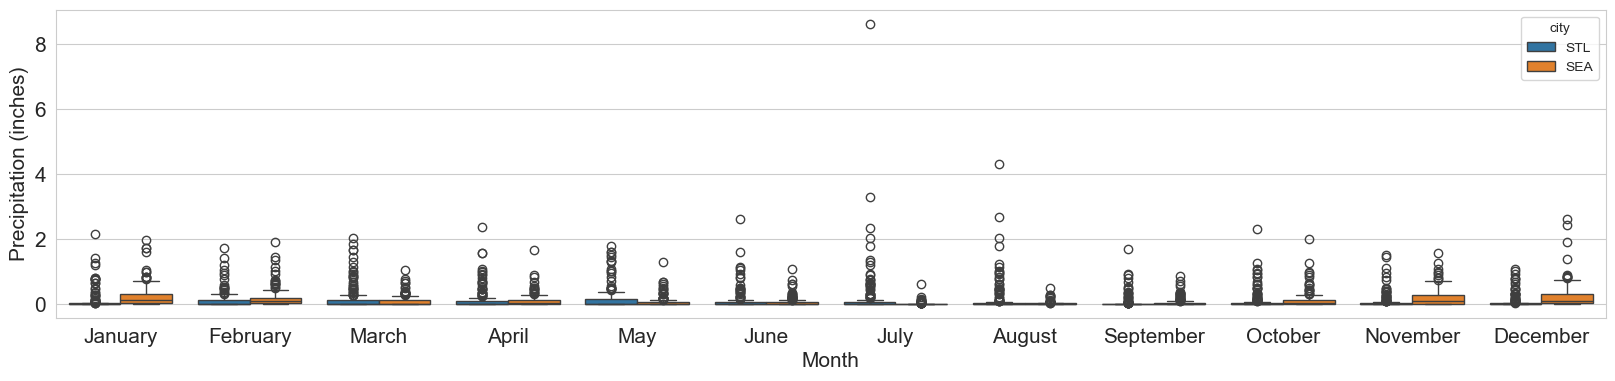

In [111]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

#get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names
plt.xticks(ticks=range(12), labels=month_names) # Set x-axis ticks to month names

plt.show()

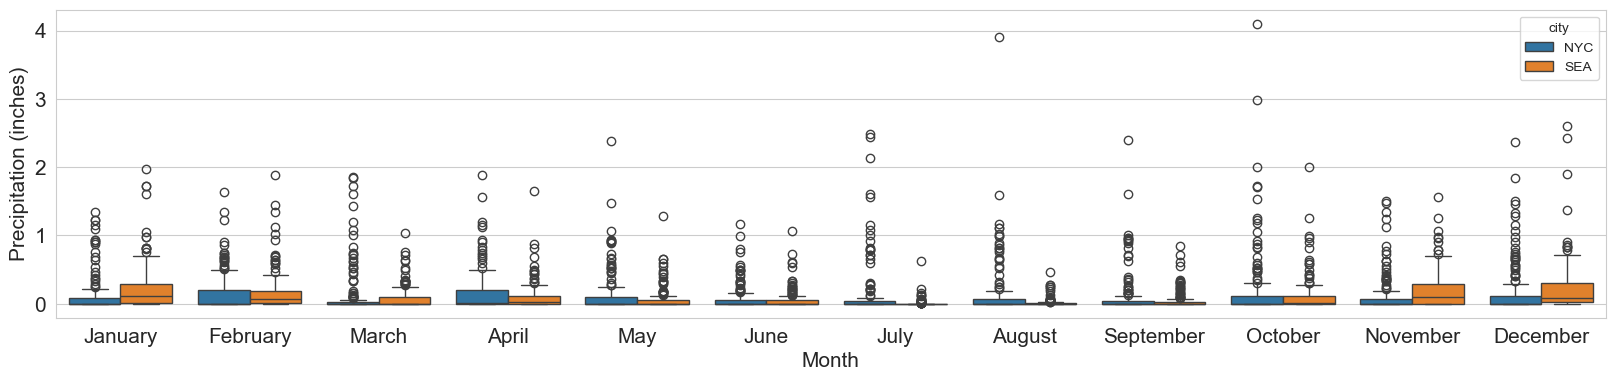

In [112]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df2, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

#get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names
plt.xticks(ticks=range(12), labels=month_names) # Set x-axis ticks to month names

plt.show()

Orient the plot horizontally for easier visual

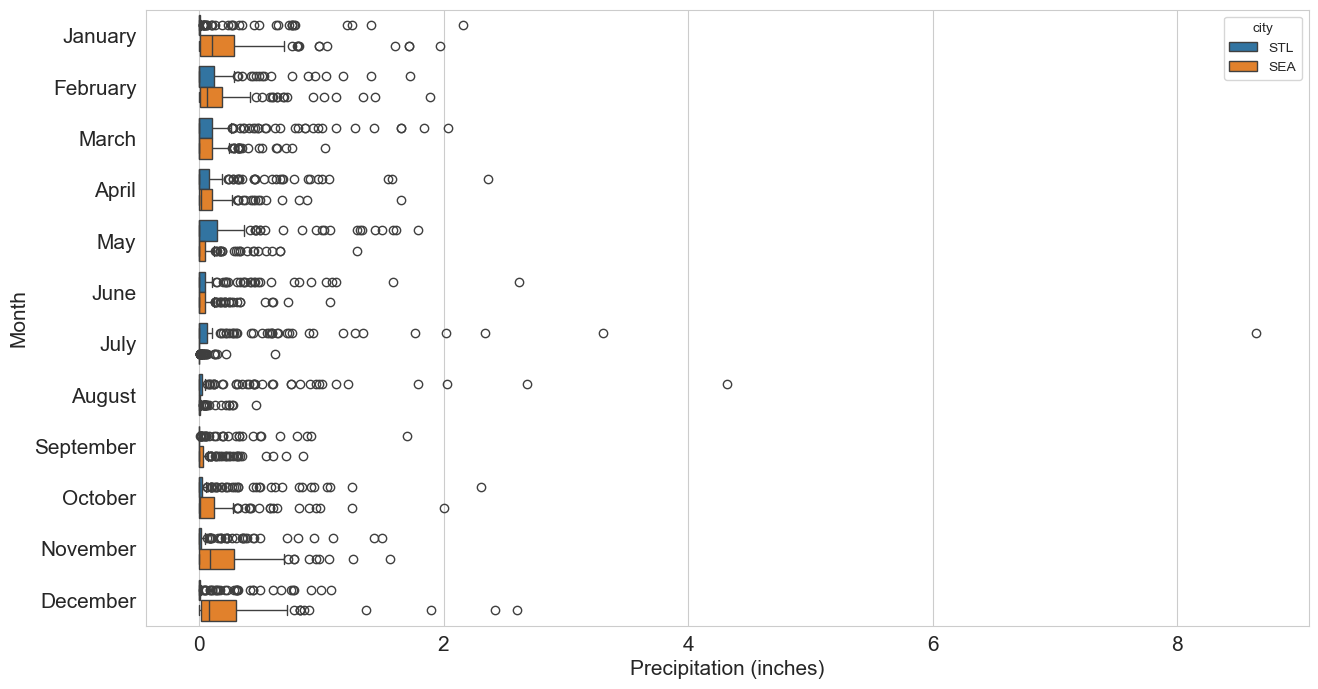

In [114]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Month', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

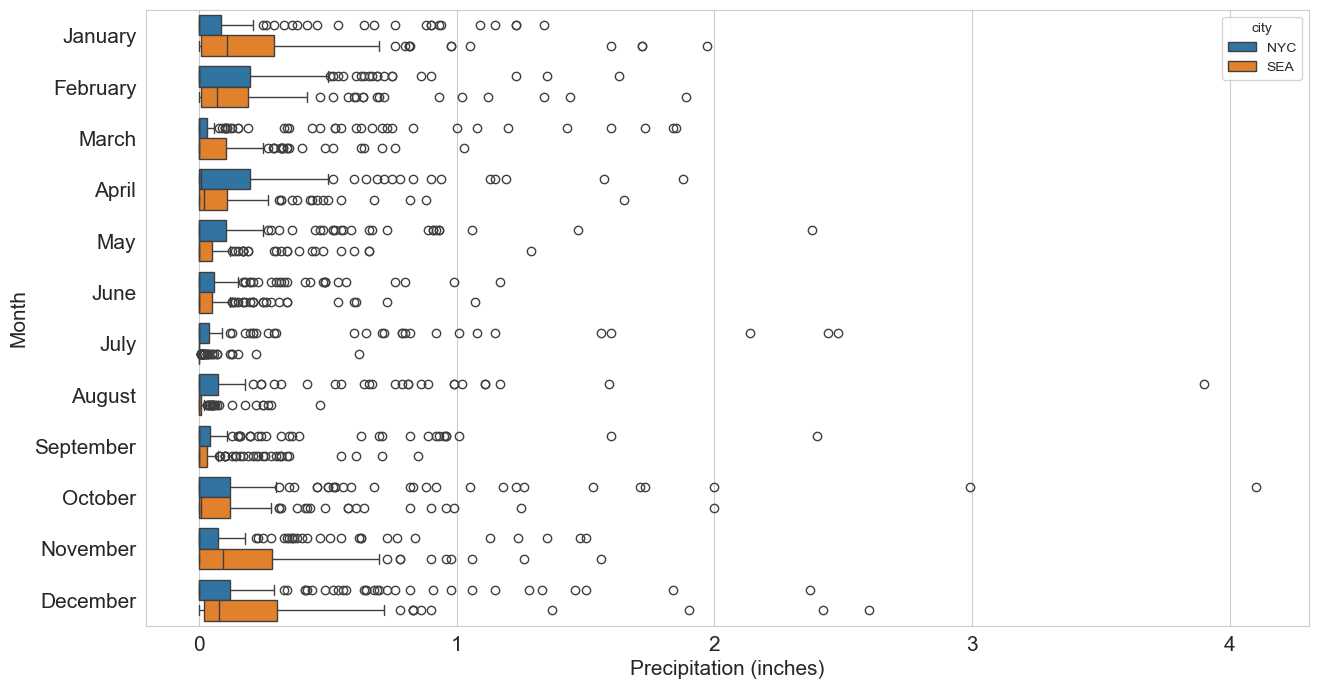

In [115]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df2, x='precipitation', y='month', hue='city', orient='h')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Month', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

Zoom in on the precipiation axis

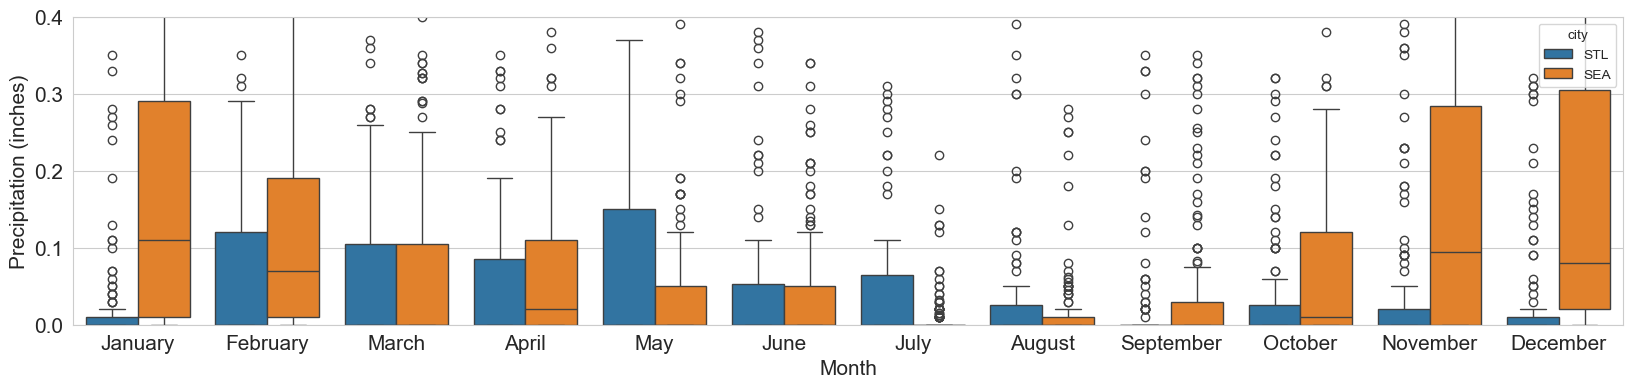

In [116]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)

plt.show()

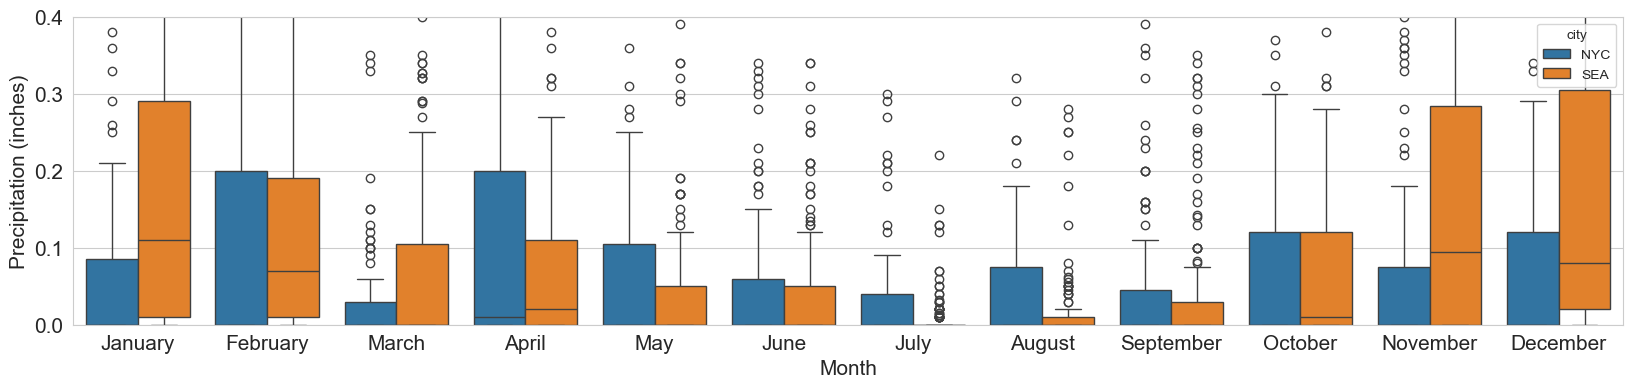

In [117]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df2, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)

plt.show()

Plot the mean precipitation each month

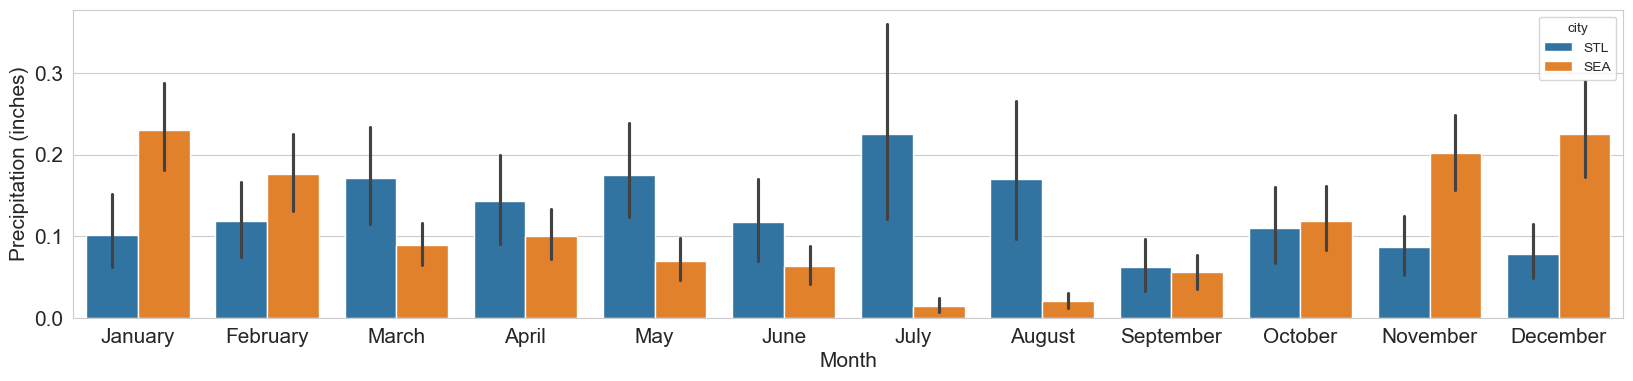

In [118]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

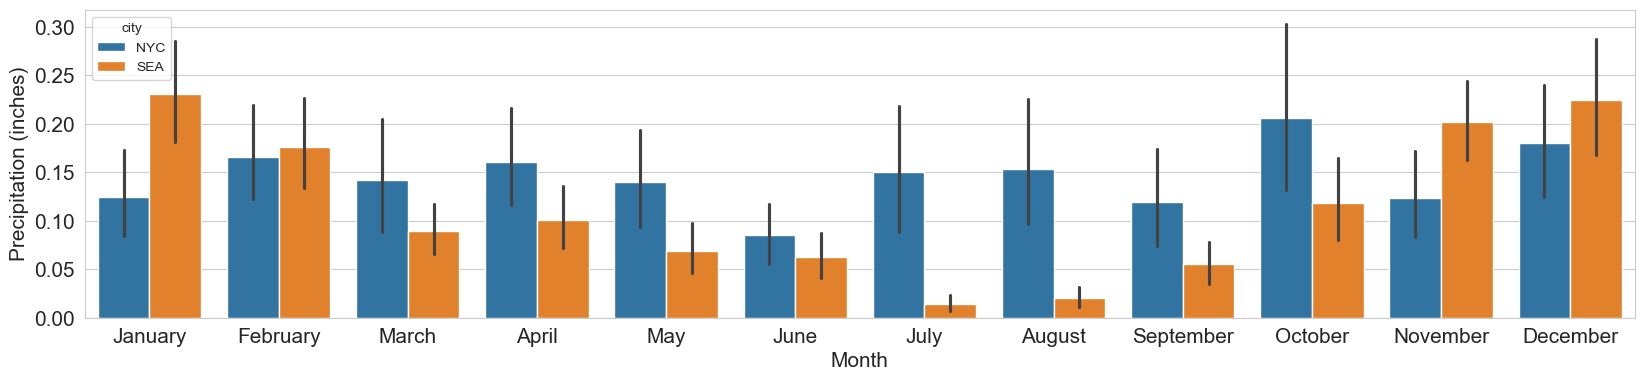

In [119]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df2, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

Compute the mean precipitation each month

In [120]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903
STL  1           0.102065
     2           0.118298
     3           0.171355
     4           0.143733
     5           0.174839
     6           0.117200
     7           0.225419
     8           0.169871
     9           0.062333
     10          0.109677
     11          0.086267
     12          0.078387

In [121]:
df2[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
NYC  1           0.124387
     2           0.166312
     3           0.141790
     4           0.160267
     5           0.140516
     6           0.085400
     7           0.150774
     8           0.153161
     9           0.119867
     10          0.206129
     11          0.123667
     12          0.180323
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

Plot the proportion of days with any precipitation

In [123]:
df['any_precipitation'] = df['precipitation'] > 0
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,STL,0.0,1,1,False
1,2018-01-02,STL,0.0,2,1,False
2,2018-01-03,STL,0.0,3,1,False
3,2018-01-04,STL,0.0,4,1,False
4,2018-01-05,STL,0.0,5,1,False


In [124]:
df2['any_precipitation'] = df2['precipitation'] > 0
df2.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,NYC,0.00,1,1,False
1,2018-01-02,NYC,0.00,2,1,False
2,2018-01-03,NYC,0.00,3,1,False
3,2018-01-04,NYC,0.17,4,1,True
4,2018-01-05,NYC,1.09,5,1,True


Plot the proportion of days with any precipitation over the 5 years

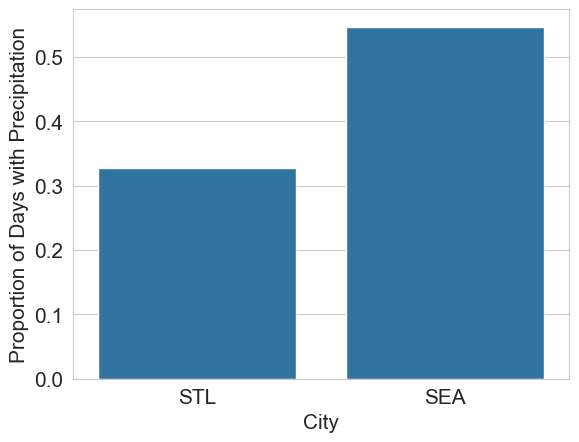

In [125]:
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of Days with Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

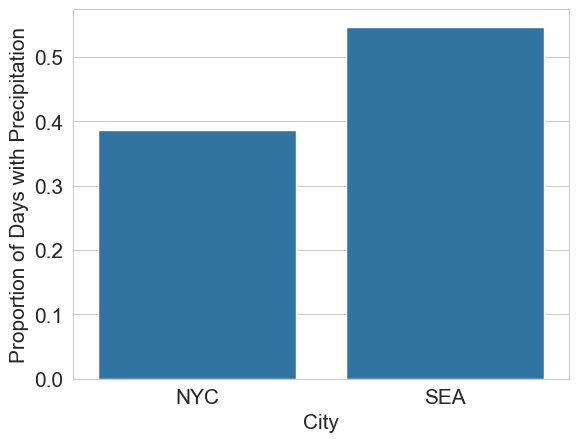

In [126]:
sns.barplot(data=df2, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of Days with Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

Plot the proportion of days with precipitation each month

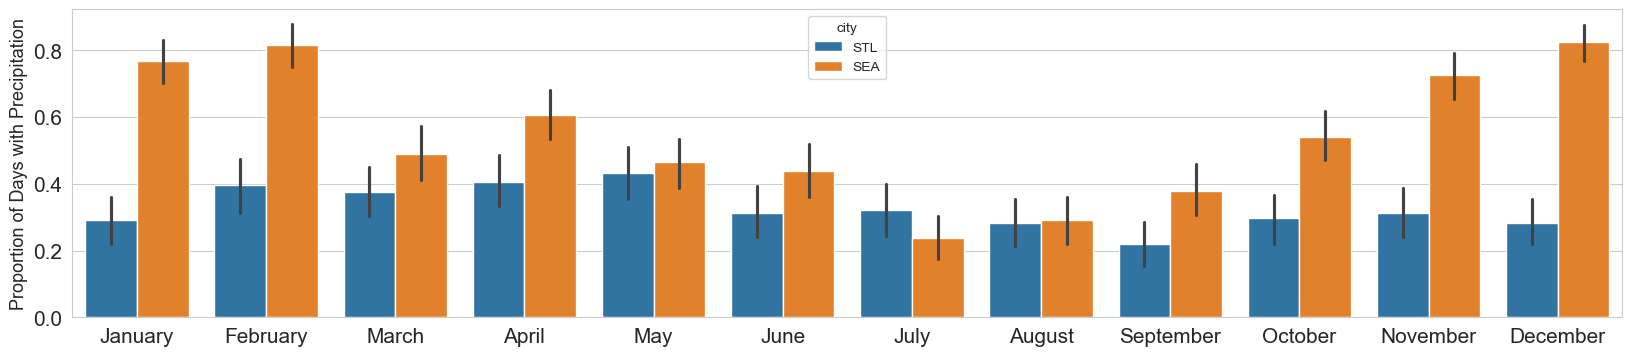

In [127]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

plt.show()

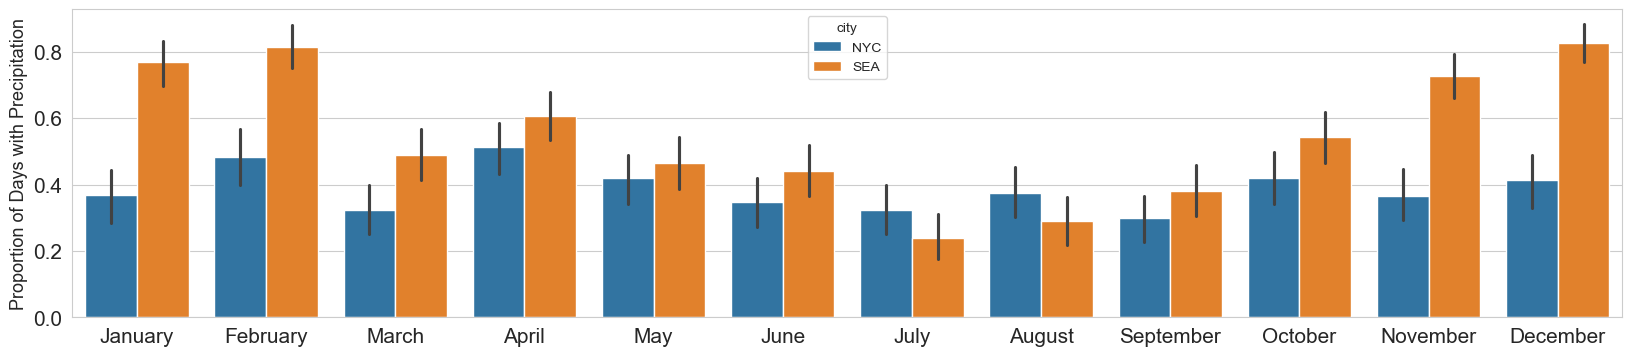

In [128]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df2, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

plt.show()